# Diabetic Dataset Analysis
## Mid Term Project Report
**Course:** Data Science Fundamentals  
**MID Term Project:** ***Data Analysis & Visualization with Python of US 130 Hospitals Diabetic Dataset***  
***Submitted by:***  
Muhammzad Hamza (FA23-BSE-111)  
Muhammzad Sami (FA23-BSE-132)  
Syed Muhammad Dawood Bukhari (FA23-BSE-178)  
**Instructor:** Sir Usman Shehzaib  
**Date:** October 20,2025

---

In [175]:
#importing libraries for datapreprocessing and visualizations 
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import zscore
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# loading dataset from csv
df = pd.read_csv('diabetic_data.csv')

#  DATA PREPROCESSING AND VISUALIZATION

## 1 Data Preprocessing

### 1.1 Viewing first 15 recors of dataframe

In [176]:
#viewing first records of data frame
df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### 1.2 Viewing shape of dataframe

In [177]:
# shape of dataframe
df.shape

(101766, 50)

### 1.3 Viewing summary statistics of dataframe

In [178]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


### 1.4 Checking for `missing values` in the dataset

In [179]:
df.isnull().sum().sort_values(ascending=False)

max_glu_serum               96420
A1Cresult                   84748
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
encounter_id                    0
patient_nbr                     0
number_inpatient                0
number_emergency                0
diag_1                          0
diag_2                          0
number_diagnoses                0
diag_3                          0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

### 1.5 Droping highly missing values columns and non-necessary columns 

In [180]:
df.drop(["encounter_id","patient_nbr","weight","payer_code"],axis=1,inplace=True)
df.columns.tolist()

['race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

### 1.6 Viewing columns in the dataframe

In [181]:
# columns in the dataframe
print(df.columns.tolist())

['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


## 2 Handling missing values

### 2.1 Handling missing values in diagnosis columns `diag 1` , `diag 2` , `diag 3`

In [182]:
# Step 1: Replace '?' with NaN (taake missing values treat ho saken)
for col in ['diag_1', 'diag_2', 'diag_3']:
    df[col] = df[col].replace('?', np.nan)

# Step 2: Fill missing values with mode of that column
for col in ['diag_1', 'diag_2', 'diag_3']:
    mode_value = df[col].mode()[0]   # sabse frequent value
    df[col] = df[col].fillna(mode_value)
    print(f"{col} column filled with mode: {mode_value}")

diag_1 column filled with mode: 428
diag_2 column filled with mode: 276
diag_3 column filled with mode: 250


### 2.2 imputing missing values in max_glu_serum

In [183]:
#imputing missing values in 'max_glu_serum' column with 'not_tested' 


df['max_glu_serum'] = df['max_glu_serum'].replace(np.nan, 'not_tested')
print(f" no of missing in {df[['max_glu_serum']].isnull().sum()}")


 no of missing in max_glu_serum    0
dtype: int64


In [184]:
df['max_glu_serum'].unique()

array(['not_tested', '>300', 'Norm', '>200'], dtype=object)

### 2.3 Imputing missing values in race column

In [185]:
#proportional imputation for 'race' column
# Step 1: Replace '?' with NaN for consistency
df['race'] = df['race'].replace('?', np.nan)

# Step 2: Calculate proportions (excluding NaN)
proportions = df['race'].value_counts(normalize=True)

# Step 3: Find how many values are missing
n_missing = df['race'].isna().sum()
print(f"Missing values in 'race': {n_missing}")

# Step 4: Create a random sample based on proportions
imputed_values = np.random.choice(
    proportions.index,           # unique race categories
    size=n_missing,              # number of missing values
    p=proportions.values         # their probabilities
)

# Step 5: Fill missing values with sampled values
df.loc[df['race'].isna(), 'race'] = imputed_values

#  Now all missing values are filled proportionally
print("Proportional mode imputation done for 'race' column.")
print(df['race'].value_counts())

# race_counts = df['race'].value_counts(dropna=False)

# print("Unique values in 'race' column with their counts:")
# print(race_counts)


Missing values in 'race': 2273
Proportional mode imputation done for 'race' column.
race
Caucasian          77865
AfricanAmerican    19615
Hispanic            2088
Other               1541
Asian                657
Name: count, dtype: int64


### 2.4 imputing missing  in A1Cresults

In [186]:
df["A1Cresult"].fillna("not tested", inplace=True)
df["A1Cresult"].unique()

C:\Users\Muhammad Hamza\AppData\Local\Temp\ipykernel_22008\2181931278.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





array(['not tested', '>7', '>8', 'Norm'], dtype=object)

### 2.5 imputing missing values in medical speciality


In [187]:
df['medical_specialty'] = df['medical_specialty'].replace('?', 'not_known')
print(f" no of missing in {df[['medical_specialty']].isnull().sum()}")

 no of missing in medical_specialty    0
dtype: int64


## 3. Handling outliers

### 3.1 Viewing  numerical columns

In [188]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(numeric_cols)


Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')


In [189]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd

# Define numeric columns
numeric_cols = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
                'time_in_hospital', 'num_lab_procedures', 'num_procedures',
                'num_medications', 'number_outpatient', 'number_emergency',
                'number_inpatient', 'number_diagnoses']

# Z-score computation
threshold = 2.5
z_scores = np.abs(stats.zscore(df[numeric_cols], nan_policy='omit'))
outliers = (z_scores > threshold)
outlier_counts = np.sum(outliers, axis=0)

# Outlier summary
outlier_summary = pd.DataFrame({
    'Column': numeric_cols,
    'Outlier_Count': outlier_counts,
    'Total_Rows': len(df),
    'Outlier_%': (outlier_counts / len(df) * 100).round(2)
}).sort_values(by='Outlier_Count', ascending=False)

print(" Outlier Summary (Before Dropping):")
print(outlier_summary)




 Outlier Summary (Before Dropping):
                      Column  Outlier_Count  Total_Rows  Outlier_%
1   discharge_disposition_id           7301      101766       7.17
2        admission_source_id           6956      101766       6.84
0          admission_type_id           5632      101766       5.53
5             num_procedures           4954      101766       4.87
3           time_in_hospital           3700      101766       3.64
9           number_inpatient           3638      101766       3.57
7          number_outpatient           2556      101766       2.51
6            num_medications           2270      101766       2.23
8           number_emergency           1664      101766       1.64
10          number_diagnoses           1320      101766       1.30
4         num_lab_procedures            318      101766       0.31


### 3.2 Viewing boxplots of numerical columns to identify outliers

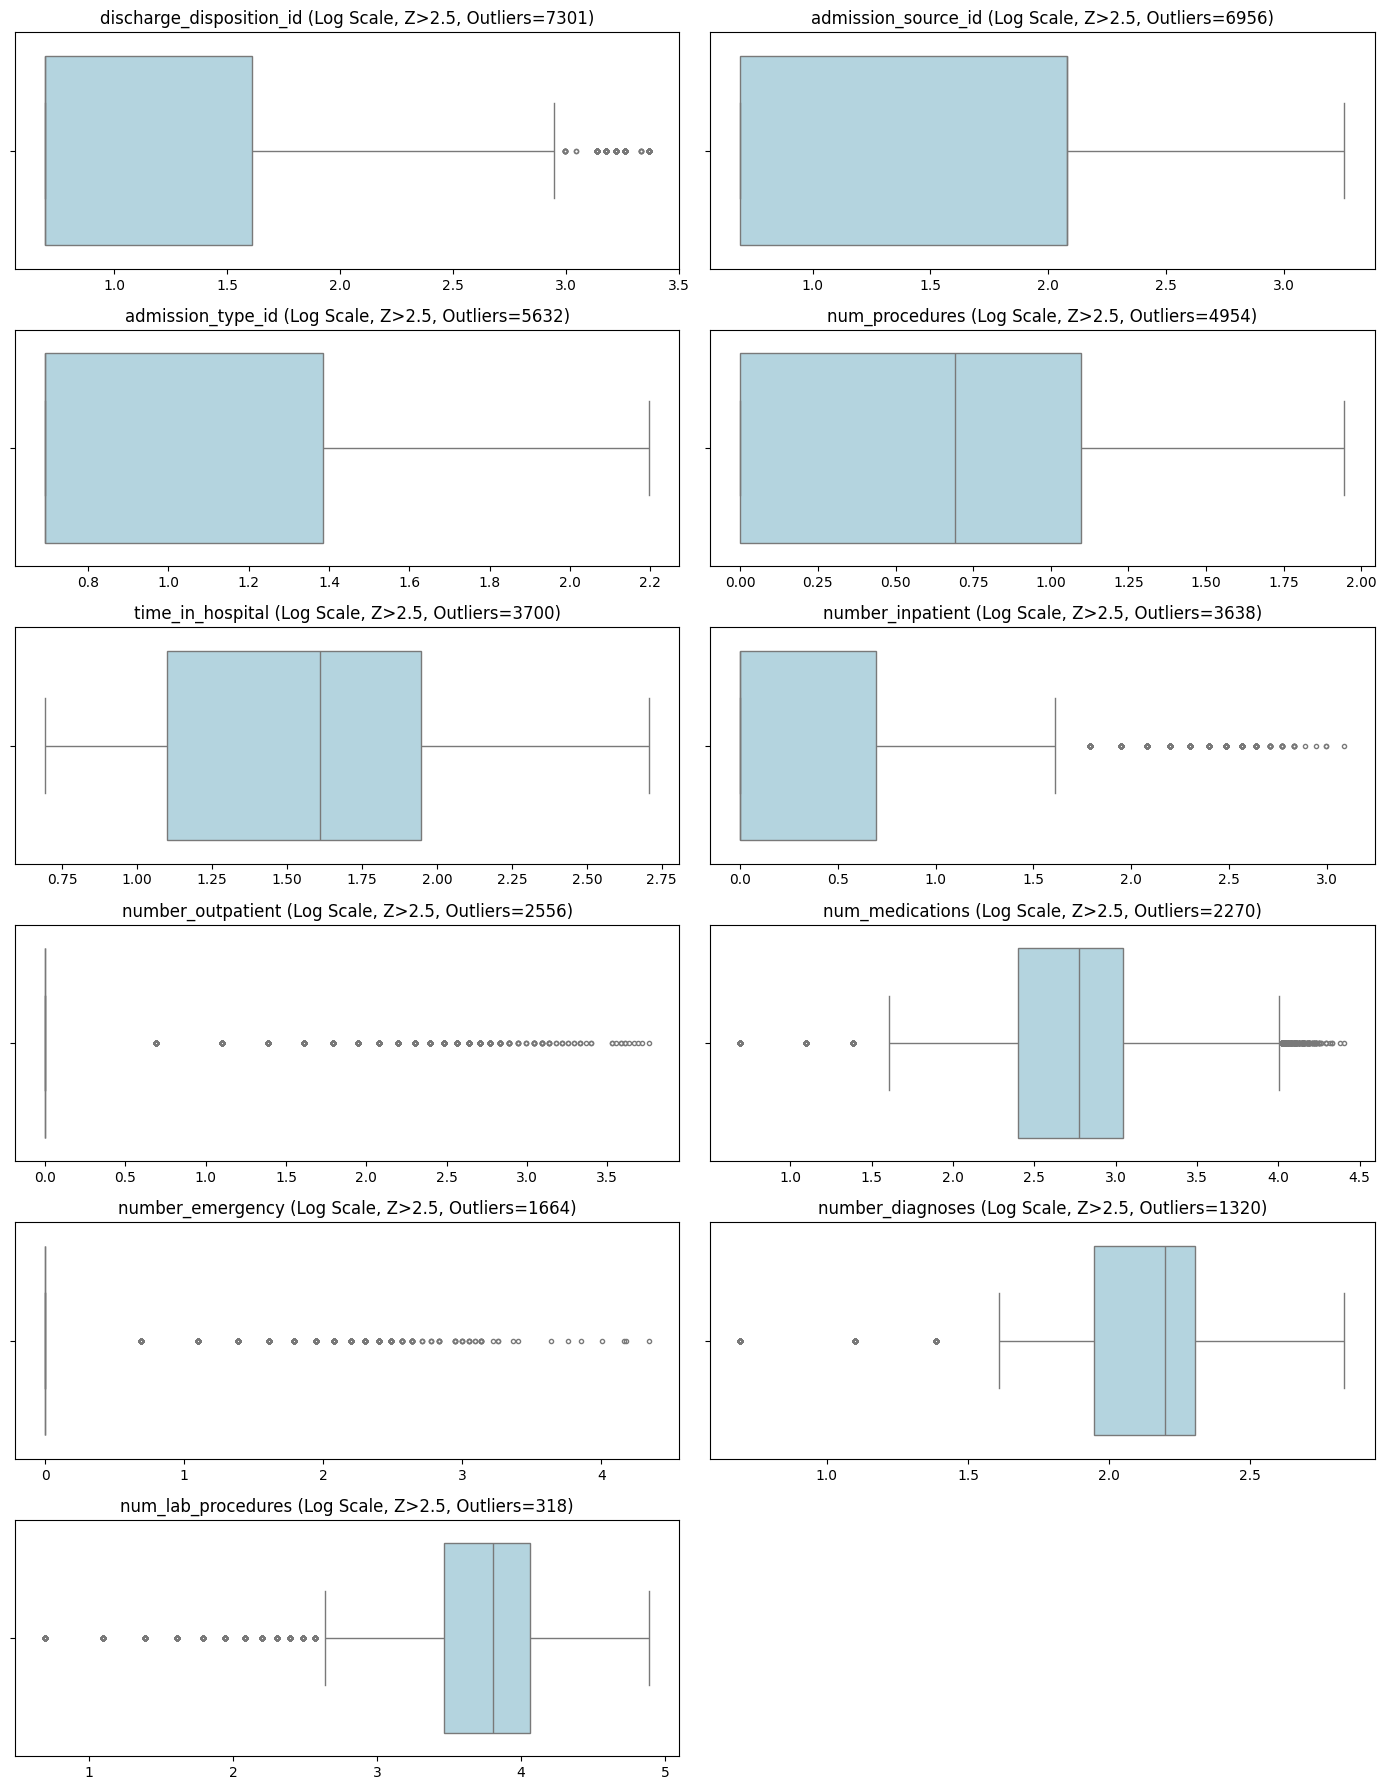

In [190]:
# Visualization
plt.figure(figsize=(14, 18))
for i, col in enumerate(outlier_summary['Column'], 1):
    plt.subplot(6, 2, i)
    sns.boxplot(x=np.log1p(df[col]), color='lightblue', fliersize=3)
    plt.title(f'{col} (Log Scale, Z>{threshold}, Outliers={int(outlier_counts[numeric_cols.index(col)])})')
    plt.xlabel('')
plt.tight_layout()
plt.show()

In [191]:
# Choose threshold
threshold = 2.5

# Calculate Z-scores only for numeric columns
z_scores = np.abs(stats.zscore(df[numeric_cols], nan_policy='omit'))

# Identify which values are outliers
outliers = (z_scores > threshold)

# Count outliers per column
outlier_counts = np.sum(outliers, axis=0)

# Convert to DataFrame for better readability
outlier_summary = pd.DataFrame({
    'Column': numeric_cols,
    'Outlier_Count': outlier_counts,
    'Total_Rows': len(df),
    'Outlier_%': (outlier_counts / len(df) * 100).round(2)
})

# Sort columns with most outliers first
outlier_summary = outlier_summary.sort_values(by='Outlier_Count', ascending=False)

print(" Outlier Summary (Before Dropping):")
print(outlier_summary)
# Remove rows with any outliers
df = df[(z_scores < threshold).all(axis=1)]
print(" After removing outliers:", df.shape)




 Outlier Summary (Before Dropping):
                      Column  Outlier_Count  Total_Rows  Outlier_%
1   discharge_disposition_id           7301      101766       7.17
2        admission_source_id           6956      101766       6.84
0          admission_type_id           5632      101766       5.53
5             num_procedures           4954      101766       4.87
3           time_in_hospital           3700      101766       3.64
9           number_inpatient           3638      101766       3.57
7          number_outpatient           2556      101766       2.51
6            num_medications           2270      101766       2.23
8           number_emergency           1664      101766       1.64
10          number_diagnoses           1320      101766       1.30
4         num_lab_procedures            318      101766       0.31
 After removing outliers: (71457, 46)


C:\Users\Muhammad Hamza\AppData\Local\Temp\ipykernel_22008\4025705189.py:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




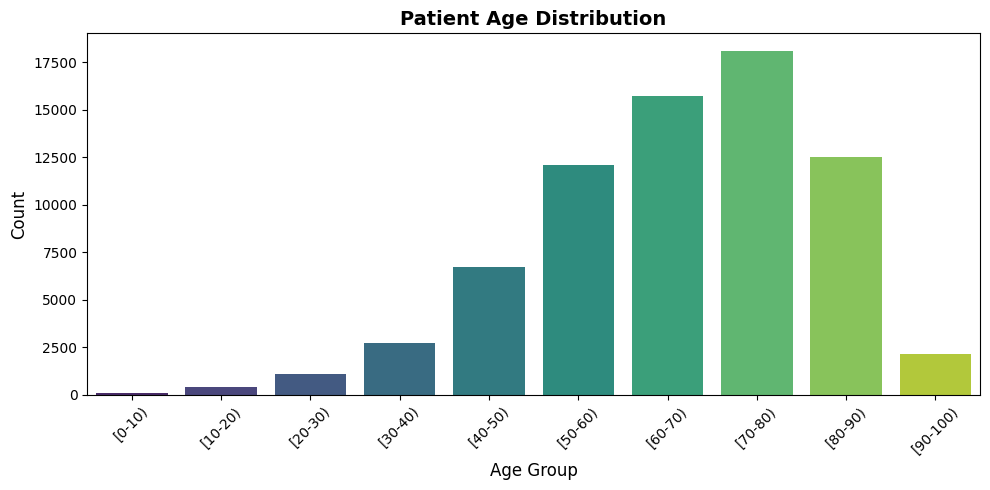

In [192]:
# histogram
import plotly.express as px
fig = px.histogram(df, x='readmitted', nbins=90, color='race', 
                   title='Readmission Distribution by Race')
fig.show()


# pie
fig = px.pie(df, names='race', 
             # pallete
            color_discrete_sequence=px.colors.sequential.RdBu,
            title='Race Distribution')
fig.show()



# Sunburst: Readmission → Race → Gender → Age
fig = px.sunburst(df, 
                  path=['readmitted', 'race', 'gender', 'age'],
                  title='Patient Demographics Flow to Readmission Status',
                  color='readmitted',
                  color_discrete_map={'0': '#2ecc71', '1': '#e74c3c'})
fig.update_traces(textinfo='label+percent parent')
fig.show()



# Age Distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='age', order=sorted(df['age'].unique()), palette='viridis')
plt.title('Patient Age Distribution', fontsize=14, weight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [193]:
age_categories = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']
age_mapping = {idx: label for idx, label in enumerate(age_categories)}

procedures_by_age = (
    df.groupby('age', as_index=False)['num_procedures']
      .sum()
      .assign(age_group=lambda d: d['age'].map(lambda code: age_mapping.get(code, str(code))))
      .sort_values('age')
)

fig = px.pie(
    procedures_by_age,
    names='age_group',
    values='num_procedures',
    title='Total Number of Procedures by Age Group',
    hole=0.3
)
fig.update_traces(textinfo='percent+label')
fig.show()

In [194]:
# --- List of categorical features ---
categorical_cols = [
    'race', 'gender', 'age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3',
    'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
    'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
    'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
    'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin',
    'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
    'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
    'diabetesMed'
]  # readmitted is target

chi_square_results = []

print(" Chi-Square Test Results for Association with 'readmitted'")
print("=" * 90)


for col in categorical_cols:
    # Handle missing values to avoid errors
    df[col] = df[col].fillna('missing')

    # Build contingency table (cross-tab)
    contingency_table = pd.crosstab(df[col], df['readmitted'])

    # Perform chi-square test
    chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

    # Compute Cramér's V (strength of association)
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    cramers_v = np.sqrt(chi2_stat / (n * min_dim))

    chi_square_results.append({
        'Feature': col,
        'Chi2_Statistic': chi2_stat,
        'P_Value': p_val,
        'Cramers_V': cramers_v,
        'Significant': 'Yes' if p_val < 0.05 else 'No'
    })

# Convert results to DataFrame
results_df = pd.DataFrame(chi_square_results).sort_values(by='P_Value')

# --- Display results ---
print(results_df.to_string(index=False))

# --- Show significant features only ---
sig = results_df[results_df['Significant'] == 'Yes']
print("\n" + "=" * 90)
print(f" Significant Features (p < 0.05): {len(sig)} out of {len(categorical_cols)}")
print("\nFeatures likely associated with readmission:")
print(sig['Feature'].tolist())


 Chi-Square Test Results for Association with 'readmitted'


C:\Users\Muhammad Hamza\AppData\Local\Temp\ipykernel_22008\222901292.py:32: RuntimeWarning:

invalid value encountered in divide

C:\Users\Muhammad Hamza\AppData\Local\Temp\ipykernel_22008\222901292.py:32: RuntimeWarning:

invalid value encountered in divide

C:\Users\Muhammad Hamza\AppData\Local\Temp\ipykernel_22008\222901292.py:32: RuntimeWarning:

invalid value encountered in divide



                 Feature  Chi2_Statistic       P_Value  Cramers_V Significant
                  diag_1     3595.348473 1.498354e-193   0.158611         Yes
       medical_specialty      974.620905 6.385487e-126   0.082581         Yes
                  diag_2     2947.093678 2.317777e-109   0.143602         Yes
                  diag_3     2949.603279  3.427226e-96   0.143663         Yes
                 insulin      361.899368  4.299684e-75   0.050322         Yes
             diabetesMed      295.533000  6.696140e-65   0.064310         Yes
                     age      354.228974  3.024274e-64   0.049786         Yes
                  change      178.312972  1.904716e-39   0.049954         Yes
                    race       98.175313  1.007091e-17   0.026210         Yes
           max_glu_serum       77.369146  1.247362e-14   0.023267         Yes
               metformin       63.099029  1.053631e-11   0.021012         Yes
               glipizide       52.608443  1.406803e-09   0.01918

In [ ]:
# Map readmitted to binary (admitted again or not)
df['readmitted'] = df['readmitted'].map({'NO': 0, '>30': 1, '<30': 1})

# Compute correlation matrix (numeric only)
corr = df.corr(numeric_only=True)

# ---  Step 1: Correlation with Target ---
target_corr = corr['readmitted'].drop('readmitted').sort_values(ascending=False)

# Display top correlated features
print("\n Correlation of Features with Target (readmitted):\n")
print(target_corr.to_string())

# ---  Step 2: Suggest Features Based on Threshold ---
threshold = 0.1  # Adjust as needed
strong_features = target_corr[abs(target_corr) >= threshold]
weak_features = target_corr[abs(target_corr) < threshold]

print("\n Features to KEEP (|corr| >= 0.1):")
print(strong_features.index.tolist())

print("\n Features to DROP (|corr| < 0.1):")
print(weak_features.index.tolist())

# ---  Step 3: Correlation Heatmap ---
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8}
)

plt.title("🔥 Feature Correlation Heatmap (Including readmitted)", fontsize=15, pad=15)
plt.show()

# --- 🧩 Step 4: Highlight Top Positive & Negative Correlations ---
top_pos = target_corr.head(10)
top_neg = target_corr.tail(10)

print("\n🔼 Top 10 Features Positively Correlated with readmitted:")
print(top_pos)

print("\n🔽 Top 10 Features Negatively Correlated with readmitted:")
print(top_neg)

print("\nDataset Shape:", df.shape)
print (df['readmitted'].unique())



 Correlation of Features with Target (readmitted):

number_inpatient            0.193153
number_diagnoses            0.121471
number_emergency            0.094395
number_outpatient           0.088364
num_medications             0.070417
time_in_hospital            0.056730
admission_source_id         0.046403
num_lab_procedures          0.029132
admission_type_id          -0.021837
discharge_disposition_id   -0.026476
num_procedures             -0.040381

 Features to KEEP (|corr| >= 0.1):
['number_inpatient', 'number_diagnoses']

 Features to DROP (|corr| < 0.1):
['number_emergency', 'number_outpatient', 'num_medications', 'time_in_hospital', 'admission_source_id', 'num_lab_procedures', 'admission_type_id', 'discharge_disposition_id', 'num_procedures']


c:\Users\Muhammad Hamza\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.



 Model Evaluation Results
Accuracy: 0.6103

Confusion Matrix:
 [[5801 2136]
 [3434 2921]]

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.73      0.68      7937
           1       0.58      0.46      0.51      6355

    accuracy                           0.61     14292
   macro avg       0.60      0.60      0.59     14292
weighted avg       0.61      0.61      0.60     14292



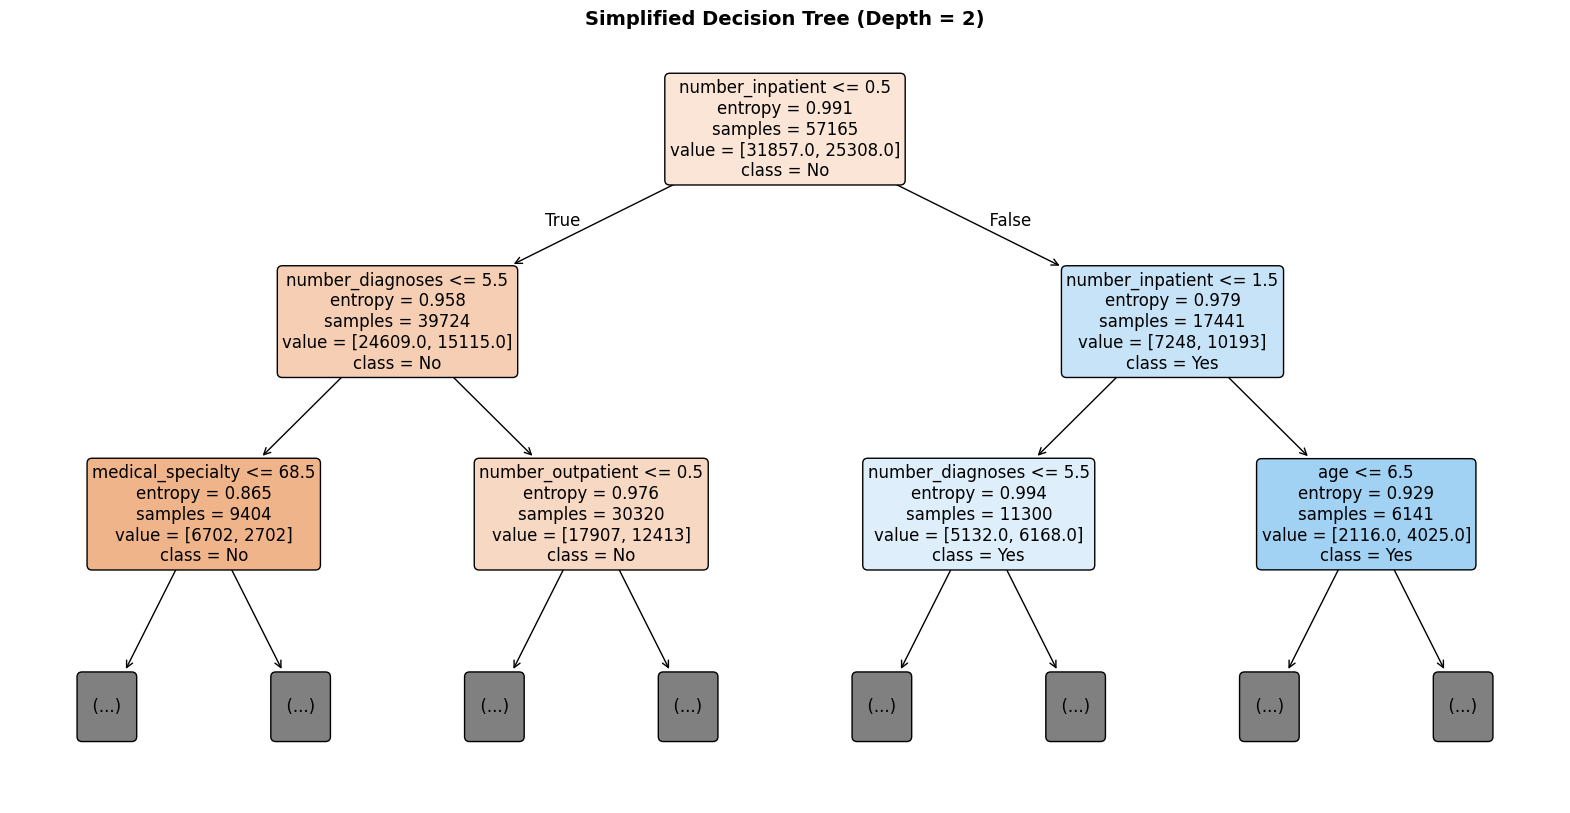

C:\Users\Muhammad Hamza\AppData\Local\Temp\ipykernel_22008\1537761396.py:84: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




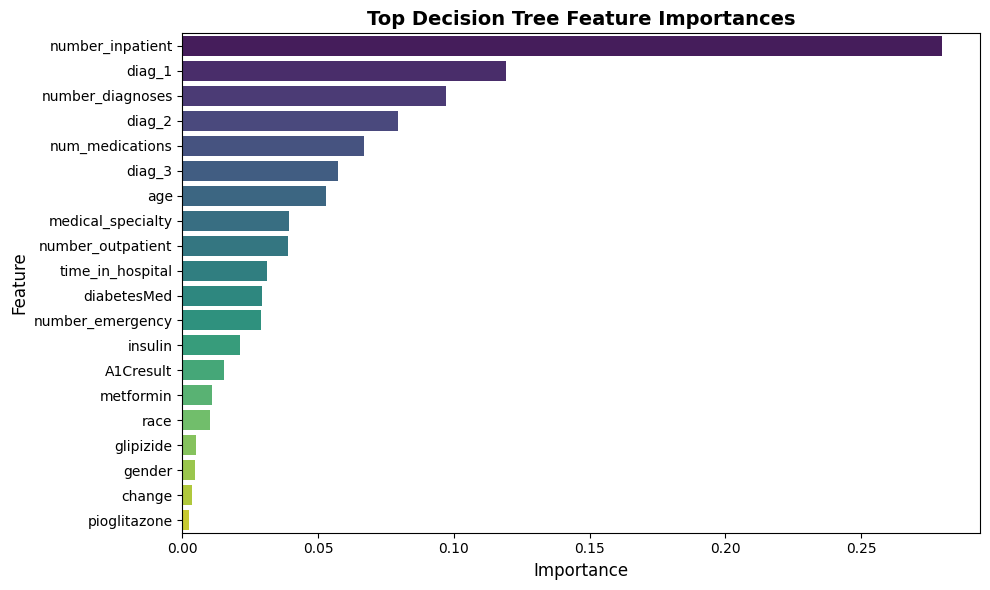

In [ ]:
# import necessary libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
# =============================================
# 🎯 Step 1: Select important features (based on chi-square and correlation)
# =============================================
selected_features = [
    'diag_1', 'diag_2', 'diag_3', 'medical_specialty',
    'insulin', 'diabetesMed', 'age', 'change', 'race',
    'max_glu_serum', 'glipizide', 'repaglinide', 'A1Cresult',
    'metformin', 'rosiglitazone', 'acarbose', 'gender', 'pioglitazone',
    'number_inpatient', 'number_diagnoses', 'number_emergency',
    'number_outpatient', 'num_medications', 'time_in_hospital'
]

# =============================================
#  Step 2: Encode categorical features using LabelEncoder
# =============================================
le = LabelEncoder()

for col in selected_features:
    if df[col].dtype == 'object':        # Encode only categorical columns
        df[col] = le.fit_transform(df[col].astype(str))

# =============================================
# Step 3: Split data into training and testing sets
# =============================================
X = df[selected_features]
y = df['readmitted']                     # Target variable (0 = No, 1 = Yes)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =============================================
#  Step 4: Train Decision Tree Classifier
# =============================================
model = DecisionTreeClassifier(
    criterion='entropy',    # Can also try 'gini'
    max_depth=10,           # Limit depth to prevent overfitting
    random_state=42
)

model.fit(X_train, y_train)

# =============================================
#  Step 5: Evaluate Model Performance
# =============================================
y_pred = model.predict(X_test)

print(" Model Evaluation Results")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# =============================================
# Step 6: Visualize Simplified Decision Tree (Top 6 Levels)
# =============================================
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=selected_features,
    class_names=['No', 'Yes'],
    filled=True,
    rounded=True,
    max_depth=2,       # 👈 Show only first 2 levels
    fontsize=12
)
plt.title("Simplified Decision Tree (Depth = 2)", fontsize=14, weight='bold')
plt.show()

# =============================================
#  Step 7: Feature Importance Visualization
# =============================================
importances = model.feature_importances_

# Create DataFrame and sort by importance
imp_df = pd.DataFrame({
    'feature': selected_features,
    'importance': importances
}).sort_values('importance', ascending=False).head(20)

# Plot top 20 features
plt.figure(figsize=(10, 6))
sns.barplot(data=imp_df, x='importance', y='feature', palette='viridis')
plt.title('Top Decision Tree Feature Importances', fontsize=14, weight='bold')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()
